# Excercise 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

## a) Data analysis
To analyse the data we first will load the data as a pandas DataFrame

In [2]:
weekly_sales = pd.read_csv("Task_4_weekly_sales_TurboPlasmaXPL.csv", names=["sales"])
weekly_sales.insert(loc=0, column='week', value=range(1, len(weekly_sales)+1))
weekly_sales.head()

,week,sales
0,1,43
1,2,57
2,3,10
3,4,64
4,5,62


### Plot of data
From the plot you can quickly see that the sales of the TurboPlasmaXML are very unstable in the beginning of the year and start to stabilize at around week 15.
A cause for this can be that the market introduction of the TurboPlasmaXML wasn't very smooth and supply problems could have held back sales, especially in week two and ten. 

To handle the data I would suggest to cut off the first 15 weeks since they a very high standard deviation and are not representative for the leater weeks in the dataset.  
Also one could argue that the sales will contiune on the stabilized level and most likely will not drop to the levels seen in the first weeks.

In addition to that the data becomes a lot easier to handle since there is no trend (and no sesonality) in the sales data anymore, whereas there was a strong trend in the first 14 weeks.

Text(0.5, 1.0, 'Sales of TurboPlasmaXML per Week')

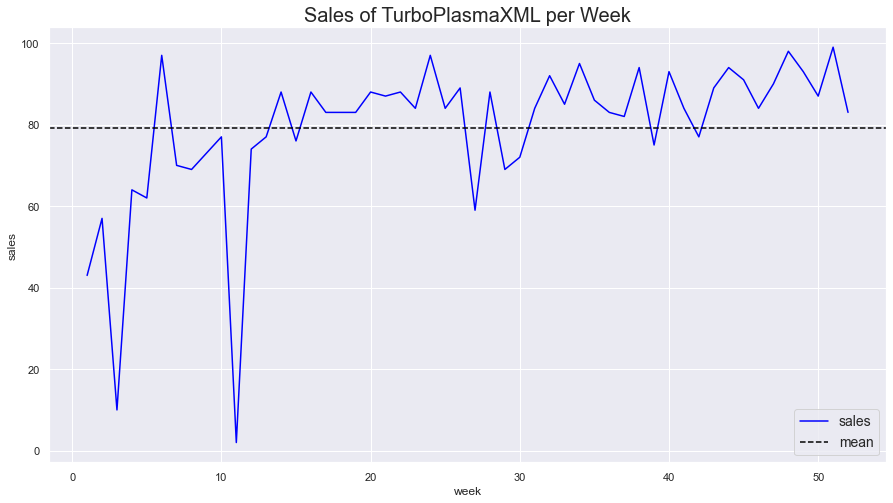

In [3]:
graph = sns.lineplot(data=weekly_sales, x="week", y="sales", color = "blue", label="sales")
graph.axhline(weekly_sales.sales.mean(), color = "black", label="mean", linestyle="--")
graph.legend(loc=4, prop={'size': 14})
graph.set_title("Sales of TurboPlasmaXML per Week", size=20)

### Mean and Standard Deviation
The Standard deviation in the first 14 weeks is more than double the standard deviation in the later weeks (week 15 and after).
Also in the boxplot one can see that there are from week 15 and onwards the few outliers that exist are closer to the mean than for week 1 to 14 or the whole dataset.


Text(0.5, 1.0, 'Boxplot for different Intervals')

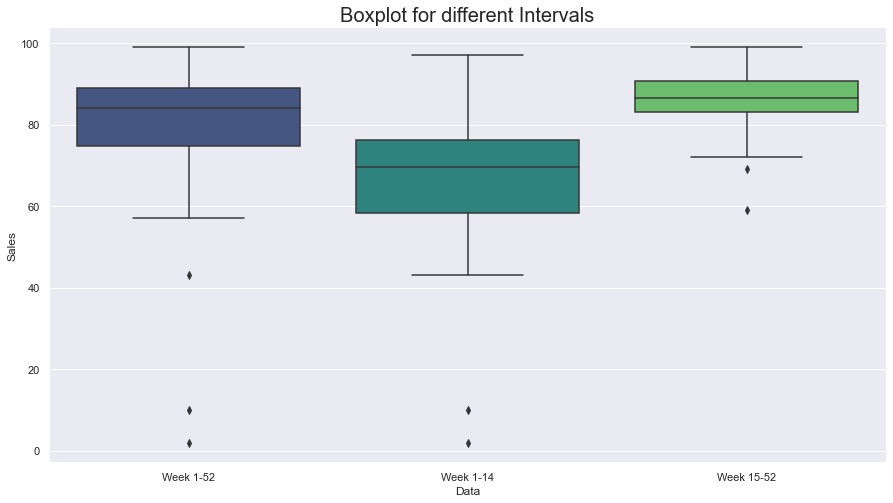

In [32]:
weekly_sales_boxplot = pd.concat([
    pd.DataFrame({"Sales":weekly_sales.sales, "Data":"Week 1-52"}), 
    pd.DataFrame({"Sales":weekly_sales.sales[:14], "Data":"Week 1-14"}),
    pd.DataFrame({"Sales":weekly_sales.sales[14:], "Data":"Week 15-52"})
    ])

graph = sns.boxplot(x="Data", y="Sales", data=weekly_sales_boxplot, palette="viridis")
graph.set_title("Boxplot for different Intervals", size=20)

In [4]:
print(f"The average weekly sales are: {weekly_sales.sales.mean()} with a standard deviation of {weekly_sales.sales.std()}")
print(f"For weeks [1,14] the average weekly sales are: {weekly_sales.sales[:14].mean()} with a standard deviation of {weekly_sales.sales[:14].std()}")
print(f"For weeks [15,52] the average weekly sales are: {weekly_sales.sales[14:].mean()} with a standard deviation of {weekly_sales.sales[14:].std()}")

The average weekly sales are: 79.21153846153847 with a standard deviation of 18.672971489652994
For weeks [1,14] the average weekly sales are: 61.642857142857146 with a standard deviation of 26.920415881051895
For weeks [15,52] the average weekly sales are: 85.6842105263158 with a standard deviation of 8.134362425082182


## b) Forecasting
As argued in a) we will use the data from week 15 and onwards to create and test our forecasts.
We will look at moving average and at exponential smoothing forecasts and compare them with different error measures.

In [5]:
# Ignore first cut sales figures
cut = 14

weekly_sales_cut_avg = weekly_sales[cut:]
weekly_sales_cut_exp = weekly_sales[cut:]
weekly_sales_cut_arima = weekly_sales[cut:]
weekly_sales_cut = weekly_sales[cut:]
weekly_sales_cut.head(10)

,week,sales
14,15,76
15,16,88
16,17,83
17,18,83
18,19,83
19,20,88
20,21,87
21,22,88
22,23,84
23,24,97


### Moving Average
For the moving average forecasts we will compare the forecasts with different parameters. We will use n = 2 to n = 10.

In [6]:
# Range for n for Moving average Forecasts
range_n = range(2,11)

def add_rolling_average_forecast(df, n):
    fc = df.sales.rolling(n).mean().shift(periods=1)
    df.insert(loc=len(df.columns), column=f"moving_average_n={n}", value=fc)
    
for n in range_n:
    add_rolling_average_forecast(weekly_sales_cut_avg,n)

weekly_sales_cut_avg.head(20)

,week,sales,moving_average_n=2,moving_average_n=3,moving_average_n=4,moving_average_n=5,moving_average_n=6,moving_average_n=7,moving_average_n=8,moving_average_n=9,moving_average_n=10
14,15,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,83,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,18,83,85.5,82.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,83,83.0,84.666667,82.50,NaN,NaN,NaN,NaN,NaN,NaN
19,20,88,83.0,83.000000,84.25,82.6,NaN,NaN,NaN,NaN,NaN
20,21,87,85.5,84.666667,84.25,85.0,83.500000,NaN,NaN,NaN,NaN
21,22,88,87.5,86.000000,85.25,84.8,85.333333,84.000000,NaN,NaN,NaN
22,23,84,87.5,87.666667,86.50,85.8,85.333333,85.714286,84.500,NaN,NaN
23,24,97,86.0,86.333333,86.75,86.0,85.500000,85.142857,85.500,84.444444,NaN


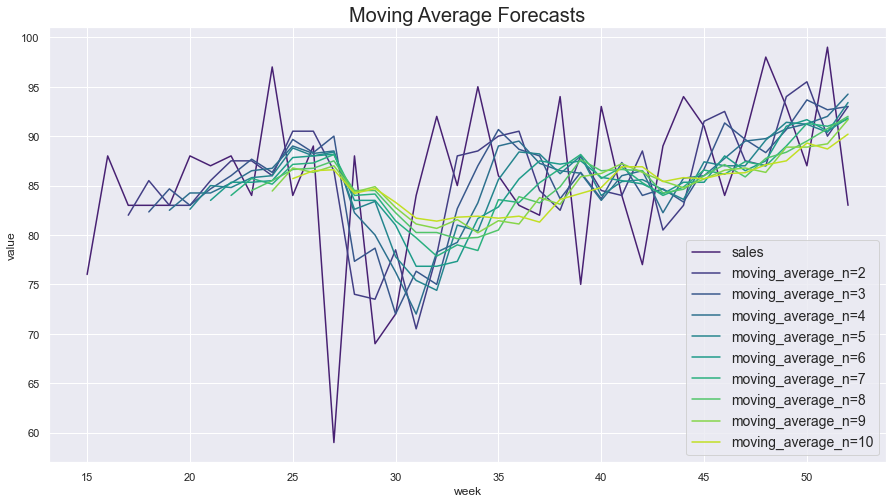

In [7]:
# Plot of Moving Average Forecasts
graph = sns.lineplot(data=pd.melt(weekly_sales_cut_avg, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.set_title("Moving Average Forecasts", size=20)
graph.legend(loc=4, prop={'size': 14})

### Simple Exponential Smoothing
For this forecasting method we will compare different smoothing parameters alpha.
We will run nine forecasts from alpha = 0.1 to 0.9.

In [8]:
# Range for alpha for exponential smoothing
range_alpha = np.arange(0.1, 1, 0.1)

def add_exponential_smoothing_forecast(df, a):
    fc = df.sales.ewm(alpha=a, adjust=False).mean().shift(periods=1, fill_value=df.sales.iloc[0])
    df.insert(loc=len(df.columns), column=f"exp_smoothing_α={a.round(1)}", value=fc)

for a in range_alpha:
    add_exponential_smoothing_forecast(df=weekly_sales_cut_exp, a=a)

weekly_sales_cut_exp.head(20)

,week,sales,exp_smoothing_α=0.1,exp_smoothing_α=0.2,exp_smoothing_α=0.3,exp_smoothing_α=0.4,exp_smoothing_α=0.5,exp_smoothing_α=0.6,exp_smoothing_α=0.7,exp_smoothing_α=0.8,exp_smoothing_α=0.9
14,15,76,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
15,16,88,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
16,17,83,77.200000,78.400000,79.600000,80.800000,82.000000,83.200000,84.400000,85.600000,86.800000
17,18,83,77.780000,79.320000,80.620000,81.680000,82.500000,83.080000,83.420000,83.520000,83.380000
18,19,83,78.302000,80.056000,81.334000,82.208000,82.750000,83.032000,83.126000,83.104000,83.038000
19,20,88,78.771800,80.644800,81.833800,82.524800,82.875000,83.012800,83.037800,83.020800,83.003800
20,21,87,79.694620,82.115840,83.683660,84.714880,85.437500,86.005120,86.511340,87.004160,87.500380
21,22,88,80.425158,83.092672,84.678562,85.628928,86.218750,86.602048,86.853402,87.000832,87.050038
22,23,84,81.182642,84.074138,85.674993,86.577357,87.109375,87.440819,87.656021,87.800166,87.905004
23,24,97,81.464378,84.059310,85.172495,85.546414,85.554688,85.376328,85.096806,84.760033,84.390500


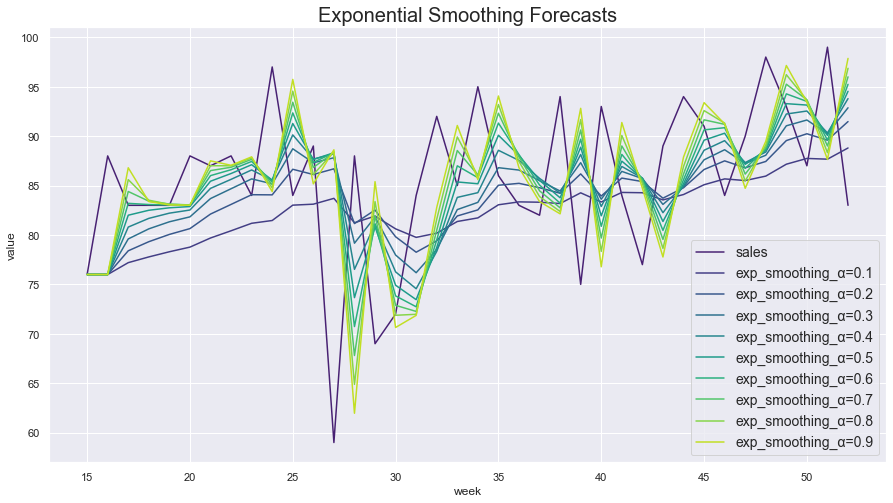

In [9]:
# Graph for exponential smoothing
graph = sns.lineplot(data=pd.melt(weekly_sales_cut_exp, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.set_title("Exponential Smoothing Forecasts", size=20)
graph.legend(loc=4, prop={'size': 14})

### ARIMA Forecast
This is probably beyond the scope of this excercise, however i still want to benchmark our simple models to a more sophisticated approach.
As training data the whole dataset up to Week 52 to fit a Arima model, therefore the results will be extremely good since we are using the same data for training and testing.  
In part c) a rolling arima forecast is implemented which first uses the data up to week 52 to forecast week 53, then uses data up to week 53 to forecast week 54 and so on.


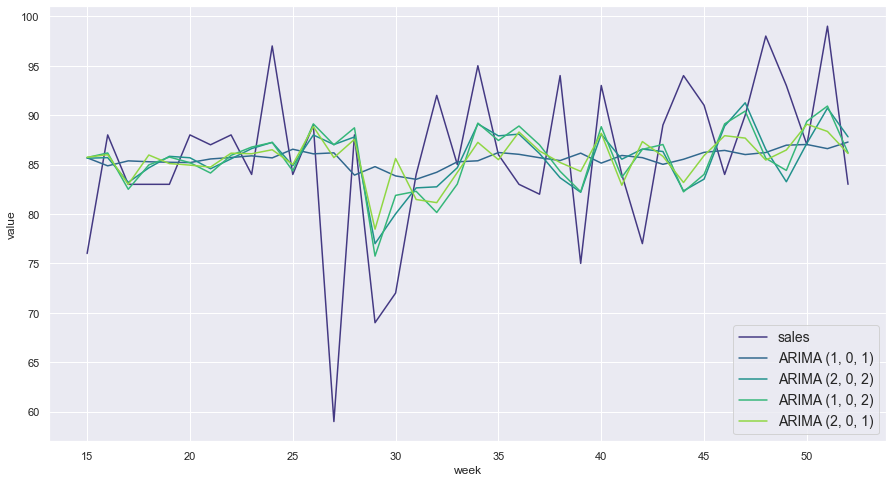

In [10]:
from statsmodels.tsa.arima.model import ARIMA

def add_arima(df, order):
    model = ARIMA(df.sales, order=order)
    results = model.fit()
    df.insert(loc=len(df.columns), column=f"ARIMA {order}", value=results.fittedvalues)
    return results

add_arima(weekly_sales_cut_arima, (1,0,1))
add_arima(weekly_sales_cut_arima, (2,0,2))
add_arima(weekly_sales_cut_arima, (1,0,2))
add_arima(weekly_sales_cut_arima, (2,0,1))

graph = sns.lineplot(data=pd.melt(weekly_sales_cut_arima, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.legend(loc=4, prop={'size': 14})


### Error Measures
To compare the different forecasting methods we will take a loot at three differetn error measures, namely MAD, RMSE and MAPE.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [12]:
weekly_sales_cut_forecasts = pd.merge(left=weekly_sales_cut_avg, right=weekly_sales_cut_exp, how='inner')
weekly_sales_cut_forecasts = pd.merge(left=weekly_sales_cut_forecasts, right=weekly_sales_cut_arima, how="inner").drop("week", axis=1)
methods = list(weekly_sales_cut_forecasts.columns[1:])
weekly_sales_cut_forecasts = np.array(weekly_sales_cut_forecasts).transpose()
sales_cut = weekly_sales_cut_forecasts[0]
sales_cut = np.tile(sales_cut, (len(methods),1))
weekly_sales_cut_forecasts = weekly_sales_cut_forecasts[1:]

In [13]:
MAE = list()
RMSE  = list()
MAPE = list()

for sales, forecast in zip(sales_cut, weekly_sales_cut_forecasts):
    sales = sales[~np.isnan(forecast)]
    forecast = forecast[~np.isnan(forecast)]
    MAE.append(mean_absolute_error(y_true=sales, y_pred=forecast))
    RMSE.append(mean_squared_error(y_true=sales, y_pred=forecast, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_true=sales, y_pred=forecast))

error_measures = pd.DataFrame([MAE,RMSE, MAPE],columns=methods, index=["MAE", "RMSE", "MAPE"])
error_measures


,moving_average_n=2,moving_average_n=3,moving_average_n=4,moving_average_n=5,moving_average_n=6,moving_average_n=7,moving_average_n=8,moving_average_n=9,moving_average_n=10,exp_smoothing_α=0.1,...,exp_smoothing_α=0.4,exp_smoothing_α=0.5,exp_smoothing_α=0.6,exp_smoothing_α=0.7,exp_smoothing_α=0.8,exp_smoothing_α=0.9,"ARIMA (1, 0, 1)","ARIMA (2, 0, 2)","ARIMA (1, 0, 2)","ARIMA (2, 0, 1)"
MAE,6.986111,6.809524,6.875000,7.224242,7.281250,7.267281,7.325000,7.521073,7.060714,7.056665,...,6.772939,6.873199,7.113938,7.480122,7.869331,8.336798,5.928077,5.425735,5.481144,5.648963
RMSE,8.957074,8.854198,8.708832,9.252289,9.125856,9.318835,9.285237,9.439395,9.033213,8.643921,...,8.727068,8.970919,9.286060,9.674622,10.140162,10.689193,7.982493,7.488948,7.579474,7.715712
MAPE,0.084760,0.083165,0.084438,0.088669,0.089669,0.089527,0.090419,0.092561,0.087825,0.084507,...,0.082551,0.083678,0.086430,0.090683,0.095242,0.100880,0.073289,0.066846,0.067524,0.069729


After we calculated the error measures for every method we have to find the best method to use for our future forecasts.

In [14]:
print("Best Forecast per error measure:")
print(error_measures.idxmin(axis=1))

Best Forecast per error measure:
MAE     ARIMA (2, 0, 2)
RMSE    ARIMA (2, 0, 2)
MAPE    ARIMA (2, 0, 2)
dtype: object


In [15]:
print("Best Forecast per error measure (ignoring ARIMA):")
cols = [c for c in error_measures.columns if not c.startswith("ARIMA")]
print(error_measures[cols].idxmin(axis=1))

Best Forecast per error measure (ignoring ARIMA):
MAE     exp_smoothing_α=0.3
RMSE    exp_smoothing_α=0.2
MAPE    exp_smoothing_α=0.2
dtype: object


Even though the ARIMA Model scores best, for simplicity I would recommend to use a exponential smoothing forecast with an alpha of 0.2, since it has the best error measures in 2 categories, if we ignore the ARIMA forecasts, and is very close to exp_smoothing_α=0.3 for the MAE, which is best for this error measure.

## c) Evaluation of Forecast Model
To evaluate our forecast model from b) we will test it on the new data and evaluate it.

In [16]:
weekly_sales_contd = pd.read_csv("Task_4_weekly_sales_TurboPlasmaXPL_cont'd.csv", names=["sales"])
weekly_sales_contd.insert(loc=0, column='week', value=range(53, len(weekly_sales_contd)+53))
weekly_sales_contd.head()

,week,sales
0,53,89
1,54,79
2,55,65
3,56,68
4,57,70


In [17]:
weekly_sales_cut_contd = pd.concat([weekly_sales_cut, weekly_sales_contd], axis=0).reset_index(drop=True)
weekly_sales_cut_contd.tail()

,week,sales
45,60,69
46,61,55
47,62,52
48,63,61
49,64,50


c:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


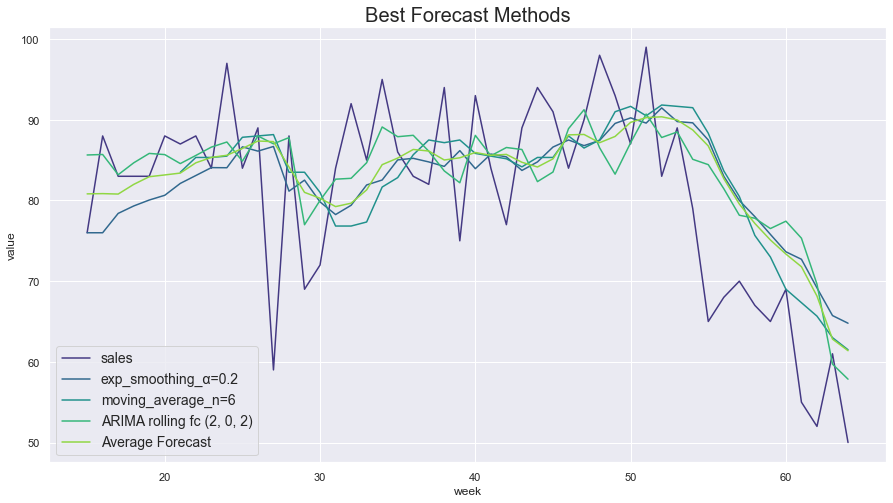

In [18]:
def add_arima_rolling_forecast(df, cutoff_week, order):
    for i in range(len(df)-weekly_sales_cut_contd[weekly_sales_cut_contd.week == 52].index[0]-1):
        train = df[df.week <= cutoff_week+i].sales
        model = ARIMA(train, order=order)
        results = model.fit()
        if i == 0: predictions = results.fittedvalues.to_list()
        prediction = results.forecast(steps=1).values[0]
        predictions.append(prediction)
    df.insert(loc=len(df.columns), column=f"ARIMA rolling fc {order}", value=predictions)

# adding the 3 best Forecasts
add_exponential_smoothing_forecast(df=weekly_sales_cut_contd, a=np.float64(0.2))
add_rolling_average_forecast(df=weekly_sales_cut_contd, n=6)
add_arima_rolling_forecast(df=weekly_sales_cut_contd, cutoff_week = 52, order=(2,0,2))

# adding a average Forecast
weekly_sales_cut_contd["Average Forecast"] = weekly_sales_cut_contd.drop(["week", "sales"], axis=1).mean(axis=1)


graph = sns.lineplot(data=pd.melt(weekly_sales_cut_contd, ['week']), x="week", y="value", hue="variable", palette="viridis")
graph.set_title("Best Forecast Methods", size=20)
graph.legend(loc=3, prop={'size': 14})

In [19]:
weekly_sales_cut_contd.tail(12)

,week,sales,exp_smoothing_α=0.2,moving_average_n=6,"ARIMA rolling fc (2, 0, 2)",Average Forecast
38,53,89,89.779314,91.666667,88.491491,89.979157
39,54,79,89.623451,91.500000,85.103315,88.742255
40,55,65,87.498761,88.333333,84.442588,86.758227
41,56,68,82.999009,83.666667,81.459448,82.708375
42,57,70,79.999207,80.500000,78.169734,79.556314
43,58,67,77.999366,75.666667,77.799955,77.155329
44,59,65,75.799492,73.000000,76.520999,75.106831
45,60,69,73.639594,69.000000,77.435371,73.358322
46,61,55,72.711675,67.333333,75.326288,71.790432
47,62,52,69.169340,65.666667,69.628876,68.154961


### Error Measures for new data only

In [20]:
forecasts = weekly_sales_cut_contd.tail(12).drop("week", axis=1)
methods = list(forecasts.columns[1:])
forecasts = np.array(forecasts).transpose()
sales = weekly_sales_cut_contd.tail(12).sales
sales = np.tile(sales, (len(methods),1))
forecasts = forecasts[1:]

MAE = list()
RMSE  = list()
MAPE = list()

for sales, forecast in zip(sales, forecasts):
    sales = sales[~np.isnan(forecast)]
    forecast = forecast[~np.isnan(forecast)]
    MAE.append(mean_absolute_error(y_true=sales, y_pred=forecast))
    RMSE.append(mean_squared_error(y_true=sales, y_pred=forecast, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_true=sales, y_pred=forecast))

error_measures = pd.DataFrame([MAE,RMSE, MAPE],columns=methods, index=["MAE", "RMSE", "MAPE"])
error_measures

,exp_smoothing_α=0.2,moving_average_n=6,"ARIMA rolling fc (2, 0, 2)",Average Forecast
MAE,11.645255,10.069444,10.461160,10.625712
RMSE,13.081046,11.824234,12.149201,12.168804
MAPE,0.189662,0.160820,0.170346,0.172123


In [21]:
print("Best Forecast per error measure (only new data considered):")
print(error_measures.idxmin(axis=1))

Best Forecast per error measure (only new data considered):
MAE     moving_average_n=6
RMSE    moving_average_n=6
MAPE    moving_average_n=6
dtype: object
